## Data Notes:
Most if not all data has been manually collected and added to CSV's/TXT's and transformed for the purpose of this analysis
- Song lyrics sourced from: [Genius](https://genius.com/artists/Newjeans)
- Billboard Hot 100 position sourced from: [https://www.billboard.com/artist/newjeans/chart-history/hsi/](https://www.billboard.com/artist/newjeans/chart-history/hsi/)
- Spotify streaming totals sourced from: [https://kworb.net/spotify/country/us_weekly_totals.html](https://kworb.net/spotify/country/us_weekly_totals.html)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
import os
import re
from typing import List, Tuple

In [ ]:
%matplotlib inline

In [33]:
def split_text_into_languages(text: str) -> Tuple[List[str], List[str]]:
    """
    Splits a mixed-language text into separate lists of English and Korean words.

    Args:
        text (str): The input mixed-language (Korean and English) text.

    Returns:
        Tuple[List[str], List[str]]: A tuple containing two lists of words,
        where the first list contains English words and the second list contains Korean words.
    """
    english_words = re.findall(r'\b[a-zA-Z]+\b', text)
    korean_words = re.findall(r'\b[가-힣]+\b', text)
    return english_words, korean_words

In [44]:
raw_data = []
for song in os.listdir("data/"):
    total_english_words = 0
    total_korean_words = 0
    with open(f"data/{song}") as f:
        while True:
            line = f.readline()
            if not line:
                break
            if "[" in line or "]" in line:
                continue
            eng_words, kor_words = split_text_into_languages(line)
            total_english_words += len(eng_words)
            total_korean_words += len(kor_words)
    raw_data.append({
        "song_name": song[:song.index(".")].replace("_", " ").title(),
        "total_english_words": total_english_words,
        "total_korean_words": total_korean_words,
        "overall_total": sum([total_english_words, total_korean_words])
    })

In [48]:
df = pd.DataFrame.from_records(raw_data)
df.head(13)

,song_name,total_english_words,total_korean_words,overall_total
0,Super Shy,355,30,385
1,Hype Boy,268,91,359
2,New Jeans,181,19,200
3,Zero,267,79,346
4,Ditto,233,69,302
5,Get Up,49,0,49
6,Cookie,154,188,342
7,Asap,598,14,612
8,Cool With You,166,39,205
9,Omg,375,140,515


In [65]:
billboard_df = pd.read_csv("data/Hot 100.csv")
billboard_df.head()

,song_name,debut_date,peak_pos,peak_date,wks_on_chrt
0,OMG,01/28/23,74,02/18/23,6
1,Super Shy,07/22/23,48,08/05/23,5
2,Ditto,01/21/23,82,02/18/23,5
3,ETA,08/05/23,81,08/05/23,1
4,Cool With You,08/05/23,93,08/05/23,1


In [67]:
spotify_streaming_totals_df = pd.read_csv("data/spotify_streaming_totals.csv")
spotify_streaming_totals_df["Artist and Title"] = spotify_streaming_totals_df["Artist and Title"].apply(lambda x: x[x.index("-")+1:])
spotify_streaming_totals_df.head()

,Artist and Title,Wks,T10,Pk (x?),PkStreams,Total
0,OMG,33,NaN,14,21594175,449153930.0
1,Ditto,24,NaN,11,22350849,332840904.0
2,Hype Boy,25,NaN,78,10224730,205135593.0
3,Super Shy,6,1.0,9,28439942,140621929.0
4,New Jeans,6,NaN,34,14777089,64775454.0


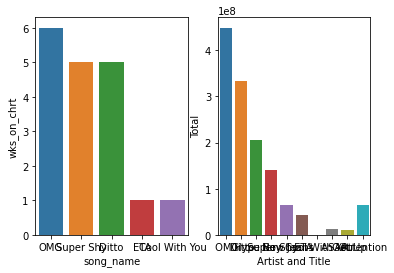

In [72]:
_, ax = plt.subplots(1,2)
sns.barplot(
    ax=ax[0],
    data=billboard_df,
    x="song_name",
    y="wks_on_chrt"
)
sns.barplot(
    ax=ax[1],
    data=spotify_streaming_totals_df,
    x="Artist and Title",
    y="Total"
)